In [1]:
import os
import sys 
sys.path.insert(0, '/home/aiwenxu/2022-xu-retinal-degeneration')

**healthy simulation**

In [2]:
from model.retinasim_healthy.cloud_simulation import cloud_to_retina_output

In [ ]:
simulation_param_txt = "../model/parameter/cottaris_original_2hz.txt"
save_folder = "../data/fig7/healthy-retina-output"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
res = 48
select_GPU = 1
genn_directory = "GeNNworkspace_{}".format(select_GPU)
cloud_to_retina_output(simulation_param_txt, save_folder, res=res, select_GPU=select_GPU, genn_directory=genn_directory)

In [3]:
from model.retinasim_healthy.glm_data_proc import bin_spikes

In [ ]:
folder = "../data/fig7/healthy-retina-output"
bin_spikes(folder, "on", 360, 100)
bin_spikes(folder, "off", 360, 100)

**phase 1/2 simulation**

In [2]:
from model.retinasim_phase12.cloud_simulation import cloud_to_retina_output

In [ ]:
light_g_max = 0.75
cone_population = 100

sp_txt = "../model/parameter/cottaris_original_2hz.txt"
sp = SimulationParam(sp_txt)
sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(cone_population)
sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(cone_population)

save_folder = "../data/fig7/{}-{}-retina-output".format(light_g_max, cone_population)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

res = 48
select_GPU = 0
genn_directory = "GeNNworkspace_{}".format(select_GPU)
cloud_to_retina_output(sp, light_g_max, "../model/weights_phase12", save_folder, res=res, select_GPU=select_GPU, genn_directory=genn_directory)

In [ ]:
bin_spikes(save_folder, "on", 360, 100)

In [ ]:
light_g_max = 0.75
cone_population = 80

sp_txt = "../model/parameter/cottaris_original_2hz.txt"
sp = SimulationParam(sp_txt)
sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(cone_population)
sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(cone_population)

save_folder = "../data/fig7/{}-{}-retina-output".format(light_g_max, cone_population)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

res = 48
select_GPU = 0
genn_directory = "GeNNworkspace_{}".format(select_GPU)
cloud_to_retina_output(sp, light_g_max, "../model/weights_phase12", save_folder, res=res, select_GPU=select_GPU, genn_directory=genn_directory)

In [ ]:
bin_spikes(save_folder, "on", 360, 100)

In [ ]:
light_g_max = 0.6
cone_population = 60

sp_txt = "../model/parameter/cottaris_original_2hz.txt"
sp = SimulationParam(sp_txt)
sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(cone_population)
sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(cone_population)

save_folder = "../data/fig7/{}-{}-retina-output".format(light_g_max, cone_population)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

res = 48
select_GPU = 0
genn_directory = "GeNNworkspace_{}".format(select_GPU)
cloud_to_retina_output(sp, light_g_max, "../model/weights_phase12", save_folder, res=res, select_GPU=select_GPU, genn_directory=genn_directory)

In [ ]:
bin_spikes(save_folder, "off", 360, 100)

In [ ]:
light_g_max = 0.45
cone_population = 40

sp_txt = "../model/parameter/cottaris_original_2hz.txt"
sp = SimulationParam(sp_txt)
sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(cone_population)
sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(cone_population)

save_folder = "../data/fig7/{}-{}-retina-output".format(light_g_max, cone_population)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

res = 48
select_GPU = 0
genn_directory = "GeNNworkspace_{}".format(select_GPU)
cloud_to_retina_output(sp, light_g_max, "../model/weights_phase12", save_folder, res=res, select_GPU=select_GPU, genn_directory=genn_directory)

In [ ]:
bin_spikes(save_folder, "off", 360, 100)

**train GLMs**

In [4]:
from model.retinasim_healthy.glm_train import train_glm

In [ ]:
train_glm("../data/fig7/healthy-retina-output", "on", 360, "../data/fig7/healthy-GLM-on-360")

In [ ]:
train_glm("../data/fig7/healthy-retina-output", "off", 360, "../data/fig7/healthy-GLM-off-360")

In [ ]:
train_glm("../data/fig7/0.75-100-retina-output", "on", 360, "../data/fig7/0.75-100-GLM-on-360")

In [ ]:
train_glm("../data/fig7/0.75-80-retina-output", "on", 360, "../data/fig7/0.75-80-GLM-on-360")

In [ ]:
train_glm("../data/fig7/0.6-60-retina-output", "off", 360, "../data/fig7/0.6-60-GLM-off-360")

In [ ]:
train_glm("../data/fig7/0.45-40-retina-output", "off", 360, "../data/fig7/0.45-40-GLM-off-360")

**visualize healthy GLM filters**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

In [3]:
def vis_filter(folder, spatial_res, num_time_step, vmin=-0.002, vmax=0.002, clip_border=True, cmap="PRGn"):
    print(folder)
    params = torch.load("{}/model_weights.pth".format(folder))
    spatial = params["linear.weight"].cpu().numpy()
    spatial = np.reshape(spatial, (num_time_step, spatial_res, spatial_res))
    fig, axs = plt.subplots(1, num_time_step, figsize=(20,4))
    for i in range(num_time_step):
        if clip_border:
            im = axs[i].imshow(spatial[i][5:spatial_res-5, 5:spatial_res-5], cmap=cmap, vmin=vmin, vmax=vmax, origin="lower")
            axs[i].set_xticks([0,37/2,37])
            axs[i].set_xticklabels([-115,0,115])
            axs[i].set_yticks([0,37/2,37])
            axs[i].set_yticklabels([-115,0,115])
        else:
            im = axs[i].imshow(spatial[i], cmap=cmap, vmin=vmin, vmax=vmax, origin="lower")
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)

../data/fig7/healthy-GLM-on-360


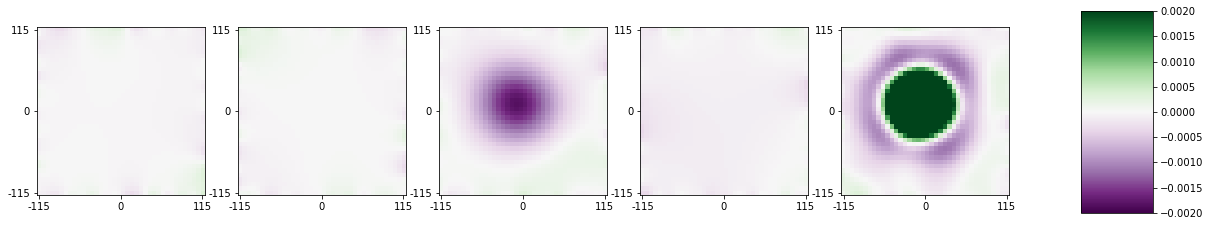

In [6]:
vis_filter("../data/fig7/healthy-GLM-on-360", spatial_res=48, num_time_step=5, clip_border=True)

../data/fig7/0.75-100-GLM-on-360


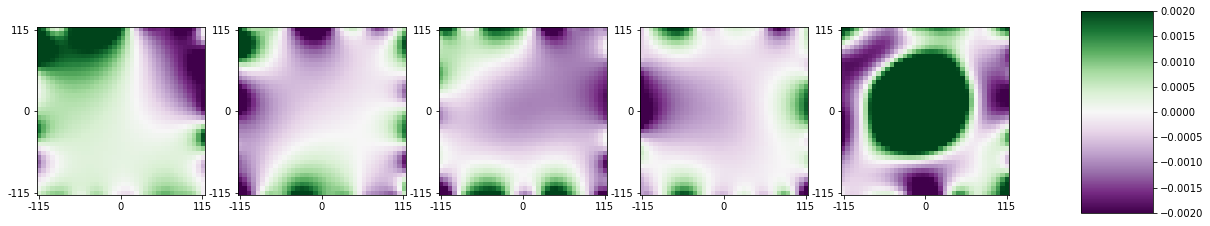

In [5]:
vis_filter("../data/fig7/0.75-100-GLM-on-360", spatial_res=48, num_time_step=5, cmap="PRGn", clip_border=True, vmin=-0.002, vmax=0.002)

../data/fig7/0.75-80-GLM-on-360


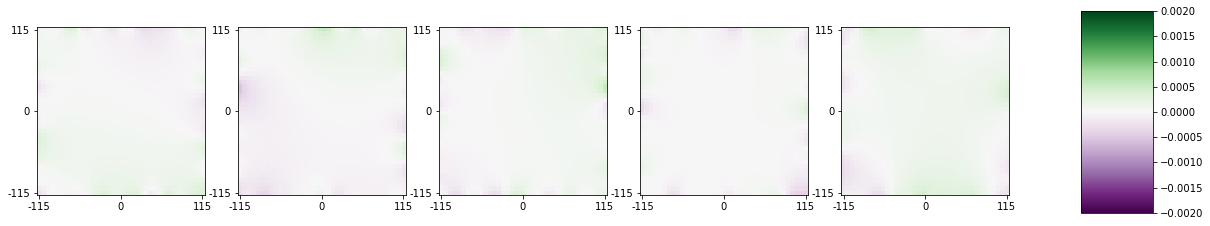

In [6]:
vis_filter("../data/fig7/0.75-80-GLM-on-360", spatial_res=48, num_time_step=5, cmap="PRGn", clip_border=True, vmin=-0.002, vmax=0.002)

../data/fig7/healthy-GLM-off-360


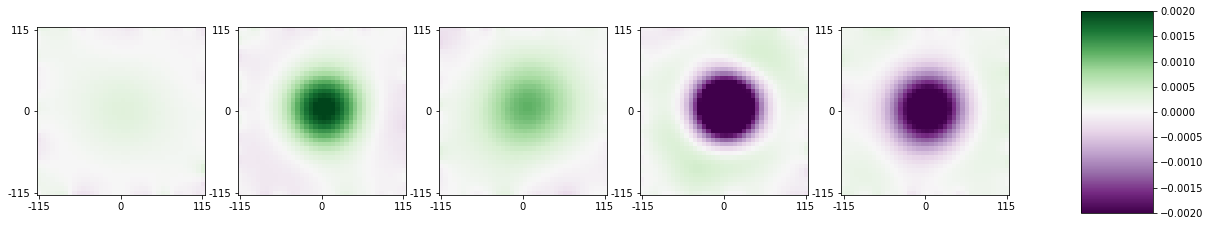

In [7]:
vis_filter("../data/fig7/healthy-GLM-off-360", spatial_res=48, num_time_step=5, clip_border=True)

../data/fig7/0.6-60-GLM-off-360


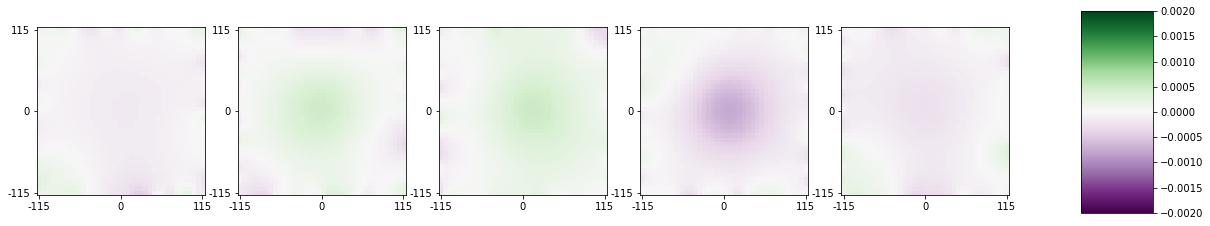

In [7]:
vis_filter("../data/fig7/0.6-60-GLM-off-360", spatial_res=48, num_time_step=5, clip_border=True)

../data/fig7/0.45-40-GLM-off-360


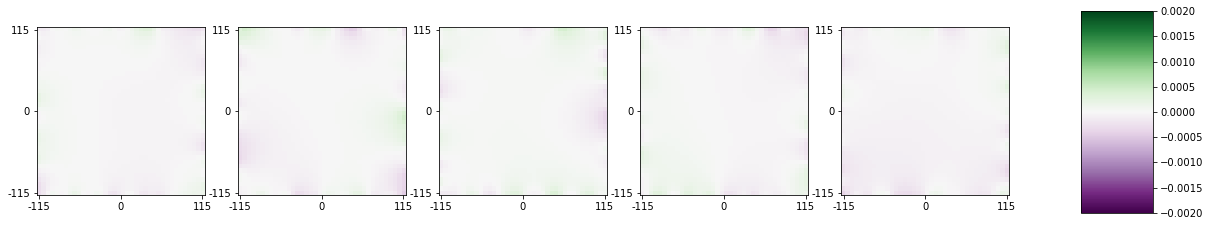

In [8]:
vis_filter("../data/fig7/0.45-40-GLM-off-360", spatial_res=48, num_time_step=5, clip_border=True)